In [53]:
import requests
from bs4 import BeautifulSoup
import re

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 
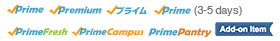
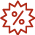

In [54]:
url ="""https://www.amazon.in/Crucial-3200MHz-2933MHz-2666MHz-CT8G4SFRA32A/dp/B08C4Z69LN/?_encoding=UTF8&pd_rd_w=asRZX&content-id=amzn1.sym.aff93425-4e25-4d86-babd-0fa9faf7ca5d%3Aamzn1.symc.36bd837a-d66d-47d1-8457-ffe9a9f3ddab&pf_rd_p=aff93425-4e25-4d86-babd-0fa9faf7ca5d&pf_rd_r=3S93CHJY45SQRCD4R7DC&pd_rd_wg=d59M2&pd_rd_r=ae6fcfa5-1b50-4c83-a0ee-f2a9eb1e8361&ref_=pd_gw_ci_mcx_mr_hp_atf_m&th=1"""
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36","Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
"Accept-Encoding": "gzip, deflate, br"}
# get url result html code here 
page = requests.get(url, headers=headers)

# testing demo site here
# page = open('index.html', 'r')

# display the data
print(page.content)

In [55]:
soup = BeautifulSoup(page.content, 'html.parser')
# soup = BeautifulSoup(page.read(), 'html.parser')
frog = soup.text

# get all the product details here

# title here
title = soup.find('span', id="productTitle").text
title = re.sub(r'\s+'," ",title)

# For price
price = str(soup.find("span", class_='a-price-whole').text).replace(".", "")

# Features here
list_ =  soup.find("div", id="feature-bullets").find_all('li')
features = [i.text for i in list_]

# Function to generate Table Data (Info List)
def getTablesToObj():
    obj_table = []
    table = soup.find('table', class_="a-normal a-spacing-micro")
    rows = table.find_all("tr")

    for row in rows:
        key = row.find_all("span")[0].text
        value = row.find_all("span")[1].text

        obj = {
            key : value
        }

        obj_table.append(obj)
    return obj_table


# Function to generate frequently brought together 
def getFrequentlyBroughtTogetherListObj():
    frequently_bought_together = soup.find('div', id='similarities_feature_div')
    fbt_titles = frequently_bought_together.select("span[class='a-size-base']")
    fbt_prices = frequently_bought_together.select("span[class='a-price-whole']")

    fbt_list = []

    for i in range(0, len(fbt_prices)):
        obj = {
            fbt_titles[i].text : fbt_prices[i].text.replace(".","")
        }

        fbt_list.append(obj)

    return fbt_list


# Get your table into object list here
table = getTablesToObj()

frequently_bought_together = getFrequentlyBroughtTogetherListObj()

In [4]:
title

' Crucial RAM 8GB DDR4 3200MHz CL22 (or 2933MHz or 2666MHz) Laptop Memory CT8G4SFRA32A '

In [5]:
price

'1,499'

In [6]:
features

[" Improve your system's responsiveness, run apps faster and multitask with ease. Extended timings - 22-22-22  ",
 ' Install with ease; no computer skills required How-to guides available at Crucial  ',
 ' Compatibility assurance when using the Crucial System Scanner or Crucial Advisor Tool  ',
 ' Micron quality and reliability is backed by superior component and module level testing and 42 years of memory expertise  ',
 ' ECC Type Non-ECC, Form Factor SODIMM, Pin Count 260-pin, PC Speed PC4-25600, Voltage 12V, Rank and Configuration 1Rx16, 1Rx8 or 2Rx8.NOTE: DRAM modules require configuration to specific systems  ',
 " Improve your system's responsiveness, run apps faster and multitask with ease. Extended timings - 22-22-22  ",
 ' Install with ease; no computer skills required How-to guides available at Crucial  ']

In [11]:
table

[{'Brand': 'Crucial'},
 {'Computer Memory Size': '8 GB'},
 {'RAM Memory Technology': 'DDR4'},
 {'Memory Speed': '3200 MHz'},
 {'Compatible Devices': 'Laptop'}]

In [52]:
def getFrequentlyBroughtTogetherListObj():
    frequently_bought_together = soup.find('div', id='similarities_feature_div')
    fbt_titles = frequently_bought_together.select("span[class='a-size-base']")
    fbt_prices = frequently_bought_together.select("span[class='a-price-whole']")

    fbt_list = []

    for i in range(0, len(fbt_prices)):
        obj = {
            fbt_titles[i].text : fbt_prices[i].text.replace(".","")
        }

        fbt_list.append(obj)

    return fbt_list

[{' Crucial RAM 8GB DDR4 3200MHz CL22 (or 2933MHz or 2666MHz) Laptop Memory CT8G4SFRA32A ': '1,499'},
 {'Crucial P3 500GB PCIe 3.0 3D NAND NVMe M.2 SSD, up to 3500MB/s - CT500P3SSD8': '2,483'}]